# Импортирование библиотек

In [73]:
import sklearn
import csv
import numpy as np
from numpy import genfromtxt
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
import pandas
from statsmodels.graphics.api import qqplot
import matplotlib.pyplot as plt

# Загрузка входных данных

In [74]:
data = pandas.read_csv('data/SPFD.csv', delimiter=',')
data

StD  TM  PF
0      7  27   1
1      2  43   0
2      7  26   1
3      8  29   1
4      3  42   0
..   ...  ..  ..
995    6  22   1
996    9  30   1
997    3  39   0
998    7  25   1
999    5  37   0

[1000 rows x 3 columns]

# Разделение данных на обучающую и тестовую выборки

In [75]:
X = data[["StD", "TM"]]
Y = data["PF"]

In [76]:
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.33, random_state=1)

# Вычисление параметров модели

In [77]:
clf = LogisticRegression(random_state=0).fit(x_train, y_train)

# Оценка модели для обучающей выборки

In [78]:
clf.score(X_test, Y_test)

0.9733333333333334

# Оценка модели для тестовой выборки

In [79]:
clf.score(X_train, Y_train)

0.9757142857142858

# Оценка классификаций

<ipython-input-80-9d46c17843e3>:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)


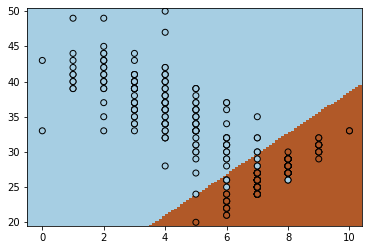

In [80]:
x_min, x_max = x_test['StD'].min() - .5, x_test['StD'].max() + .5
y_min, y_max = x_test['TM'].min() - .5, x_test['TM'].max() + .5
h = .1 # step size in the mesh
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
# Put the result into a color plot
Z = Z.reshape(xx.shape)
plt.pcolormesh(xx, yy, Z, cmap=plt.cm.Paired)
# Plot also the training points
plt.scatter(x_test['StD'], x_test['TM'], c=y_test.to_numpy(), edgecolors='k', cmap=plt.cm.Paired)

# Вычисление метрик

TN: 155, FP: 13, FN: 0, TP: 162
Precision: 0.93, Recall: 1.00, Accuracy: 0.96
MAE: 0.04, RMSE: 0.20


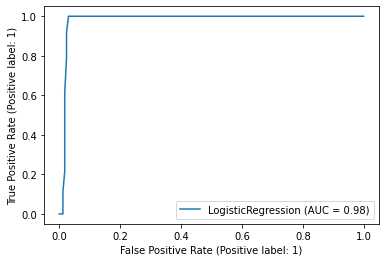

In [81]:
y_pred = clf.predict(x_test)
lr_tn, lr_fp, lr_fn, lr_tp = sklearn.metrics.confusion_matrix(y_test, y_pred).ravel()
lr_precision = sklearn.metrics.precision_score(y_test, y_pred)
lr_recall = sklearn.metrics.recall_score(y_test, y_pred)
lr_accuracy = sklearn.metrics.accuracy_score(y_test, y_pred)
lr_mae = sklearn.metrics.mean_absolute_error(y_test, y_pred)
lr_rmse = sklearn.metrics.mean_squared_error(y_test, y_pred, squared=False)
print(f'TN: {lr_tn}, FP: {lr_fp}, FN: {lr_fn}, TP: {lr_tp}')
print(f'Precision: {lr_precision:.2f}, Recall: {lr_recall:.2f}, Accuracy: {lr_accuracy:.2f}')
print(f'MAE: {lr_mae:.2f}, RMSE: {lr_rmse:.2f}')
svm_roc_display = sklearn.metrics.plot_roc_curve(clf, x_test, y_test)

# Кросс-валидация

In [82]:
folds = 5
scores = sklearn.model_selection.cross_validate(clf, X, Y, scoring = ['precision', 'recall', 'accuracy'], cv=folds)

In [83]:
data = {
    'Fold': list(range(0, folds)),
    'Precision': scores['test_precision'],
    'Recall': scores['test_recall'],
    'Accuracy': scores['test_accuracy']
}
diff = pandas.DataFrame.from_dict(data)
diff.set_index('Fold')

Precision  Recall  Accuracy
Fold                             
0      0.952381    1.00     0.975
1      0.970588    0.99     0.980
2      0.925926    1.00     0.960
3      0.980392    1.00     0.990
4      0.951923    1.00     0.975